<h1>ML_Pattern_Classification project | Main File</h1>


In [1]:
#import BirdsData from BirdExplore
from BirdExplore import BirdsData

c:\Users\dreka\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


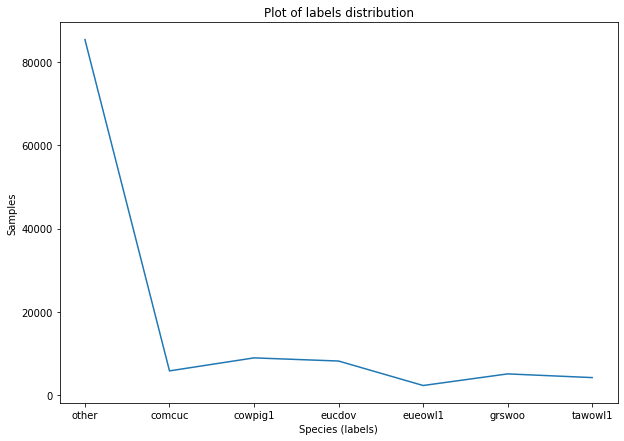

[85358, 5833, 8954, 8198, 2324, 5111, 4222]

In [2]:
BirdsData('ptichki').labels_distribution()